In [7]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import io
import csv
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from stats import mean, median, mode, multi_mode
import warnings
import matplotlib.cbook

In [2]:
url = "https://opendata.arcgis.com/datasets/8070cd333824453abea19e8faa340fb8_0.geojson"
response = requests.get(url).json()

with open('lightrail_data.txt', 'w') as outfile:
   json.dump(response, outfile)
with open('lightrail_data.txt') as rail_file:
   dict_rail = json.load(rail_file)

rail_data = pd.DataFrame.from_dict(json_normalize(dict_rail['features']), orient='columns')
# Reorganizing the columns using double brackets
organized_rail_df = rail_data[['properties.StationName', 
                               'properties.Q2015_1', 
                               'properties.Q2015_2', 
                               'properties.Q2015_3', 
                               'properties.Q2015_4', 
                               'properties.Q2016_1',
                               'properties.Q2016_2',
                               'properties.Q2106_3',
                               'properties.Q2016_4',
                               'properties.Q2017_1',
                               'properties.Q2017_2',
                               'properties.Q2017_3',
                               'properties.Q2017_4',
                               'geometry.coordinates', 
                               'properties.Jurisdiction',
                               'properties.Type']]

In [3]:
renamed_rail_df = organized_rail_df.rename(columns={'properties.StationName': 'Station Name', 
                                               'properties.Q2015_1': '2015 Q1', 
                                               'properties.Q2015_2': '2015 Q2', 
                                               'properties.Q2015_3': '2015 Q3', 
                                               'properties.Q2015_4': '2015 Q4', 
                                               'properties.Q2016_1': '2016 Q1',
                                               'properties.Q2016_2': '2016 Q2',
                                               'properties.Q2106_3': '2016 Q3',
                                               'properties.Q2016_4': '2016 Q4',
                                               'properties.Q2017_1': '2017 Q1',
                                               'properties.Q2017_2': '2017 Q2',
                                               'properties.Q2017_3': '2017 Q3',
                                               'properties.Q2017_4': '2017 Q4',
                                               'geometry.coordinates': 'Stop Locations', 
                                               'properties.Jurisdiction': 'Local Municipality',
                                               'properties.Type': 'Eastbound or Westbound'})

# Replacing Boardings and Departures with proper directional naming conventions
renamed_rail_df.loc[:,'Eastbound or Westbound'] = renamed_rail_df['Eastbound or Westbound'].str.replace('Boardings', 'Eastbound').str.replace('Departures', 'Westbound')  

In [4]:
# Removing brackets from geometry.coordinates, splitting into lat/lon columns
renamed_rail_df['Locations'] = renamed_rail_df['Stop Locations'].astype(str).str.replace('\[|\]','')

# # Creating lat/lon lists
lat = []
lon = []
for row in renamed_rail_df['Locations']:
   lat.append(row.split(',')[0])
   lon.append(row.split(',')[1])
    
# appending lat and lon data to new columns in dataframe
renamed_rail_df['Latitude'] = lat
renamed_rail_df['Longitude'] = lon

# Dropping unnecessary columns
renamed_rail_df = renamed_rail_df.drop(columns=['Stop Locations', 'Locations'])
renamed_rail_df.head()

,Station Name,2015 Q1,2015 Q2,2015 Q3,2015 Q4,2016 Q1,2016 Q2,2016 Q3,2016 Q4,2017 Q1,2017 Q2,2017 Q3,2017 Q4,Local Municipality,Eastbound or Westbound,Latitude,Longitude
0,Montebello / 19th Ave,3825,3503,2416,3405,3268,2126,2144,2197,2151,2006,1883,2023,Phoenix,Eastbound,-112.09973100877106,33.520591853930384
1,19th Avenue / Camelback,1901,1773,1280,1935,1951,1936,1979,2018,2059,2000,1956,1996,Phoenix,Eastbound,-112.09880709341047,33.50954306712032
2,7th Avenue / Camelback,1059,1017,753,1127,1128,1148,1185,1243,1246,1145,1087,1132,Phoenix,Eastbound,-112.08333617468192,33.50930816892451
3,Indian School / Central Avenue,1674,1530,1049,1574,1673,1646,1575,1617,1638,1528,1378,1532,Phoenix,Eastbound,-112.07378741844016,33.49575408516081
4,Campbell / Central Avenue,956,806,700,903,933,777,826,932,921,803,791,906,Phoenix,Eastbound,-112.0737858926613,33.501409885351514


In [5]:
# What is light rail rider volume by quarter from 2015 to 2017?
quarters = ['2015 Q1','2015 Q2','2015 Q3','2015 Q4','2016 Q1','2016 Q2',/
            '2016 Q3','2016 Q4','2017 Q1','2017 Q2','2017 Q3','2017 Q4',]

passenger_volume = []

passenger_volume.append(renamed_rail_df['2015 Q1'].sum())
passenger_volume.append(renamed_rail_df['2015 Q2'].sum())
passenger_volume.append(renamed_rail_df['2015 Q3'].sum())
passenger_volume.append(renamed_rail_df['2015 Q4'].sum())
passenger_volume.append(renamed_rail_df['2016 Q1'].sum())
passenger_volume.append(renamed_rail_df['2016 Q2'].sum())
passenger_volume.append(renamed_rail_df['2016 Q3'].sum())
passenger_volume.append(renamed_rail_df['2016 Q4'].sum())
passenger_volume.append(renamed_rail_df['2017 Q1'].sum())
passenger_volume.append(renamed_rail_df['2017 Q2'].sum())
passenger_volume.append(renamed_rail_df['2017 Q3'].sum())
passenger_volume.append(renamed_rail_df['2017 Q4'].sum())
passenger_volume
quarterly_riders_df = pd.DataFrame(quarters , passenger_volume)

quarter_totals = {'Quarters':quarters, 'Passenger Volume':passenger_volume}
quarter_totals_df = pd.DataFrame(quarter_totals)
quarter_totals_df

,Quarters,Passenger Volume
0,2015 Q1,88824
1,2015 Q2,75837
2,2015 Q3,61686
3,2015 Q4,88405
4,2016 Q1,89867
5,2016 Q2,91191
6,2016 Q3,90482
7,2016 Q4,92864
8,2017 Q1,95163
9,2017 Q2,91457


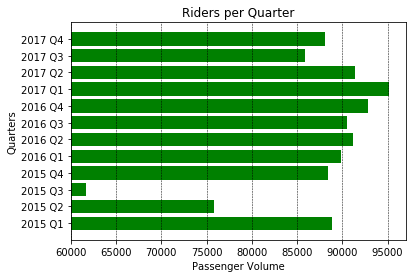

<Figure size 432x288 with 0 Axes>

In [8]:
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
x_pos = [i for i, _ in enumerate(quarters)]
plt.xlim(60000, 97000)

plt.barh(x_pos, passenger_volume, color='green')
plt.ylabel('Quarters')
plt.xlabel('Passenger Volume')
plt.title('Riders per Quarter')
ax = plt.axes()        
ax.xaxis.grid(linestyle='--', linewidth='0.5', color='black')

plt.yticks(x_pos, quarters)

plt.show()

# Save the Figure
plt.savefig('Riders per Quarter.png')

In [9]:
# What is the cost comparison/benefits of riding light rail or using a Grid bike? 
# (light rail one way $2/$4 all day)   
# (Grid bike .12c per min/$7 deposit required {*First hr. covered}
cost_comparison_df = pd.DataFrame({'Transit Options':['One Way Pass', 'All Day Pass', 'Bike Cost'],
                                   'Prices':['2', '4', '7.20']})
cost_comparison_df

,Transit Options,Prices
0,One Way Pass,2
1,All Day Pass,4
2,Bike Cost,7.20


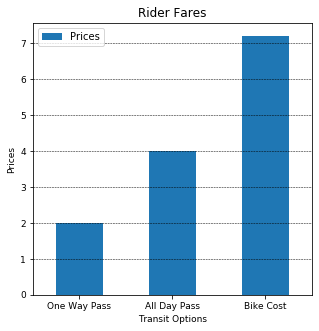

<Figure size 432x288 with 0 Axes>

In [10]:
cost_comparison_df.Prices = pd.to_numeric(cost_comparison_df.Prices)
ax = cost_comparison_df.plot.bar(x='Transit Options', y='Prices', title ='Rider Fares', figsize=(5, 5), fontsize=9, rot=0)
ax.set_xlabel('Transit Options', fontsize=9)
ax.set_ylabel('Prices', fontsize=9)
ax.yaxis.grid(linestyle='--', linewidth='0.5', color='black')
plt.show()

# Save the Figure
plt.savefig('Rider Fares.png')

In [11]:
# What is the volume of riders between eastbound vs westbound each year?
renamed_rail_df['Annual Riders 2015']= renamed_rail_df.iloc[:, 1:5].sum(axis=1)
renamed_rail_df['Annual Riders 2016']= renamed_rail_df.iloc[:, 6:10].sum(axis=1)
renamed_rail_df['Annual Riders 2017']= renamed_rail_df.iloc[:, 11:14].sum(axis=1)
east_versus_west_df = renamed_rail_df.loc[:, ['Eastbound or Westbound', 'Annual Riders 2015', 'Annual Riders 2016', 'Annual Riders 2017']]
east_versus_west_df.head()

,Eastbound or Westbound,Annual Riders 2015,Annual Riders 2016,Annual Riders 2017
0,Eastbound,13149,8618,3906
1,Eastbound,6889,7992,3952
2,Eastbound,3956,4822,2219
3,Eastbound,5827,6476,2910
4,Eastbound,3365,3456,1697


In [12]:
east_riders_15 = east_versus_west_df.loc[east_versus_west_df['Eastbound or Westbound'] == 'Eastbound', 'Annual Riders 2015'].sum()
west_riders_15 = east_versus_west_df.loc[east_versus_west_df['Eastbound or Westbound'] == 'Westbound', 'Annual Riders 2015'].sum()
east_riders_16 = east_versus_west_df.loc[east_versus_west_df['Eastbound or Westbound'] == 'Eastbound', 'Annual Riders 2016'].sum()
west_riders_16 = east_versus_west_df.loc[east_versus_west_df['Eastbound or Westbound'] == 'Westbound', 'Annual Riders 2016'].sum()
east_riders_17 = east_versus_west_df.loc[east_versus_west_df['Eastbound or Westbound'] == 'Eastbound', 'Annual Riders 2017'].sum()
west_riders_17 = east_versus_west_df.loc[east_versus_west_df['Eastbound or Westbound'] == 'Westbound', 'Annual Riders 2017'].sum() 

riders_df = pd.DataFrame({'Annual Eastbound Riders 2015' : [east_riders_15],
                          'Annual Westbound Riders 2015' : [west_riders_15],
                          'Annual Eastbound Riders 2016' : [east_riders_16],
                          'Annual Westbound Riders 2016' : [west_riders_16],
                          'Annual Eastbound Riders 2017' : [east_riders_17],
                          'Annual Westbound Riders 2017' : [west_riders_17],})
riders_df

,Annual Eastbound Riders 2015,Annual Westbound Riders 2015,Annual Eastbound Riders 2016,Annual Westbound Riders 2016,Annual Eastbound Riders 2017,Annual Westbound Riders 2017
0,157525,157227,185551,184149,87420,86541


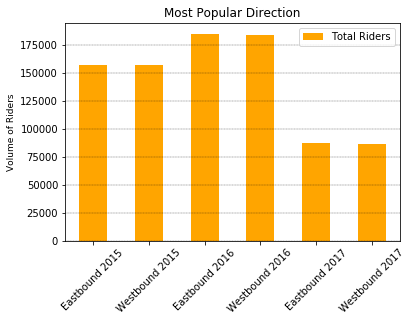

In [13]:
riders_df = pd.DataFrame({'':['Eastbound 2015', 
                                 'Westbound 2015', 
                                 'Eastbound 2016',
                                 'Westbound 2016',
                                 'Eastbound 2017',
                                 'Westbound 2017'], 
                          'Total Riders':[east_riders_15,
                                 west_riders_15,
                                 east_riders_16,
                                 west_riders_16,
                                 east_riders_17,
                                 west_riders_17]})
ax = riders_df.plot.bar(x='', y='Total Riders', rot=45, color='orange', title ='Most Popular Direction')
ax.yaxis.grid(linestyle='--', linewidth='0.3', color='black')
ax.set_ylabel('Volume of Riders', fontsize=9)

# Save the Figure
plt.savefig('Most Popular Direction.png')

In [14]:
# What are the busiest light rail locations annually?
annual_riders_15_df = renamed_rail_df[['Station Name', 'Annual Riders 2015', 'Eastbound or Westbound']]
annual_riders_16_df = renamed_rail_df[['Station Name', 'Annual Riders 2016', 'Eastbound or Westbound']]
annual_riders_17_df = renamed_rail_df[['Station Name', 'Annual Riders 2017', 'Eastbound or Westbound']]

annual_riders_15_df.nlargest(5, 'Annual Riders 2015')

,Station Name,Annual Riders 2015,Eastbound or Westbound
41,Montebello / 19th Ave,13474,Westbound
0,Montebello / 19th Ave,13149,Eastbound
59,Sycamore / Main Street,10521,Westbound
18,Sycamore / Main Street,10241,Eastbound
55,Veterens Way / College Avenue,7484,Westbound


In [15]:
annual_riders_16_df.nlargest(5, 'Annual Riders 2016')

,Station Name,Annual Riders 2016,Eastbound or Westbound
79,Dunlap / 19th Ave,9873,Westbound
38,Dunlap / 19th Ave,9659,Eastbound
78,Main Street/ Mesa Drive,9059,Westbound
37,Main Street/ Mesa Drive,8826,Eastbound
41,Montebello / 19th Ave,8644,Westbound


In [16]:
annual_riders_17_df.nlargest(5, 'Annual Riders 2017')

,Station Name,Annual Riders 2017,Eastbound or Westbound
79,Dunlap / 19th Ave,5677,Westbound
38,Dunlap / 19th Ave,5536,Eastbound
78,Main Street/ Mesa Drive,4764,Westbound
37,Main Street/ Mesa Drive,4510,Eastbound
42,19th Avenue / Camelback,4010,Westbound


In [ ]:
# # Getting data from API, turning into json file
# url = "https://municipal.systems/v1/places/az/dataTypes/shared-vehicle/data?key=f867b00f-7408-4c88-bd4d-ad4ef582b20c"
# response2 = requests.get(url).json()
# # Creating a .txt file to be read into a dataframe
# with open('bike_data.txt', 'w') as outfile2:
#   json.dump(response2, outfile2)
# with open('bike_data.txt') as bike_file:
#   dict_bike = json.load(bike_file)
# # Turning json file into a readable dataframe
# bike_data = pd.DataFrame.from_dict(json_normalize(dict_bike['results']), orient='columns')
# bike_data.head()
# # Creating editable dataframe, formatting column names
# bike_data_df = bike_data
# bike_data_df.columns = bike_data_df.columns.str.strip().str.lower().str.replace('data.','')
# # Dropping unnecessary columns
# bike_data_df = bike_data_df[['name','geometry.coordinates','operators',]]
# # Removing brackets from operators values, then dropping JUMP LA rows
# # Inserting error removal, the below .loc line provides a "warning" that is
# # a false positive, the data is still correct and what we are looking for
# # See http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# # and https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
# # For further information
# pd.options.mode.chained_assignment = None  # default='warn'
# bike_data_df.loc[:,'operators'] = bike_data_df['operators'].str.get(0)
# bike_data_df = bike_data_df[bike_data_df.operators != 'JUMP LA']
# # Removing brackets from geometry.coordinates, splitting into lat/lon columns
# bike_data_df['coordinates'] = bike_data_df['geometry.coordinates'].astype(str).str.replace('\[|\]','')
# # # # Creating lat/lon lists
# lat = []
# lon = []
# for row in bike_data_df['coordinates']:
#    lat.append(row.split(',')[0])
#    lon.append(row.split(',')[1])
# # appending lat and lon data to new columns in dataframe
# bike_data_df['latitude'] = lat
# bike_data_df['longitude'] = lon
# # # Dropping unnecessary columns
# bike_data_df = bike_data_df[['name','operators','latitude','longitude']]
# bike_data_df.head()